<a href="https://colab.research.google.com/github/NN2777/Phyton-Image-Processing/blob/main/Praktikum_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma Correction pada citra
---------------------------------
Masukkan nilai Gamma: 3


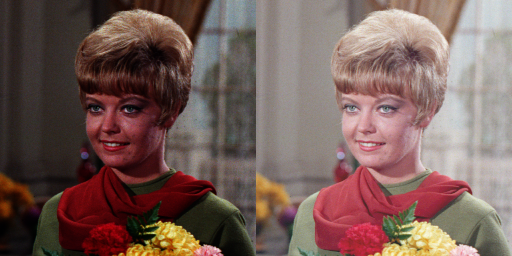

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Gamma Correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  ('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)

img = cv.imread("/content/drive/MyDrive/koceng/female.tiff")
gammaImg = gammaCorrection(img, gamma)

final_frame = cv.hconcat((img, gammaImg))
cv2_imshow(final_frame)

Bit depth
---------------------------------
Masukkan nilai bit depth: 2


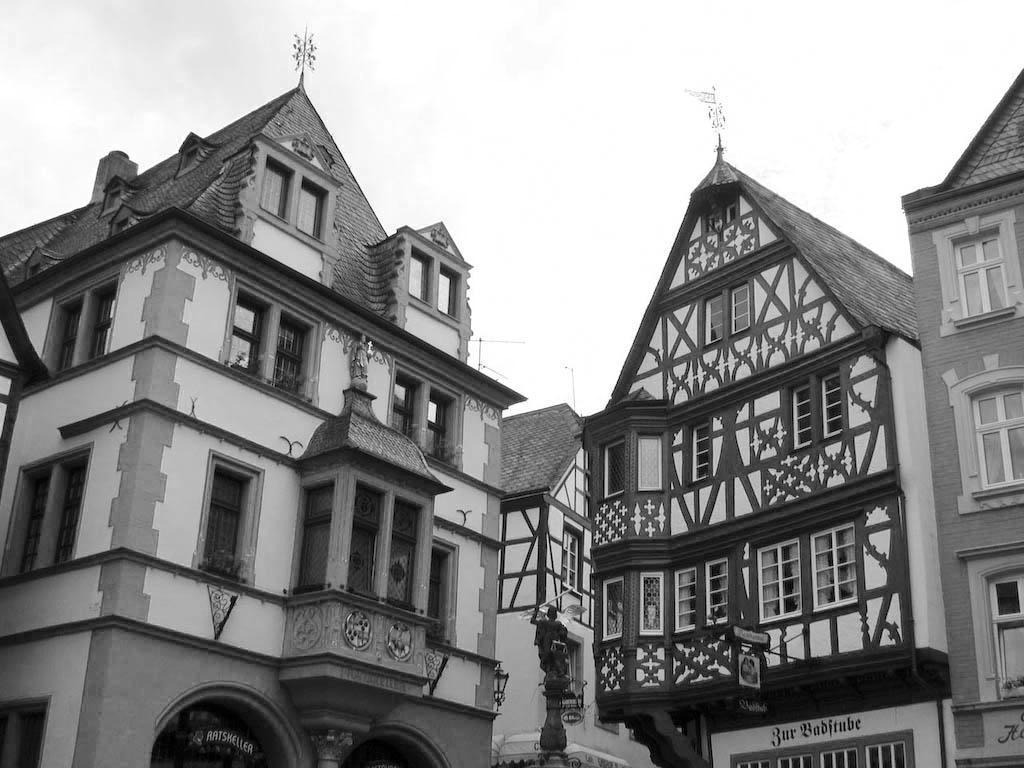

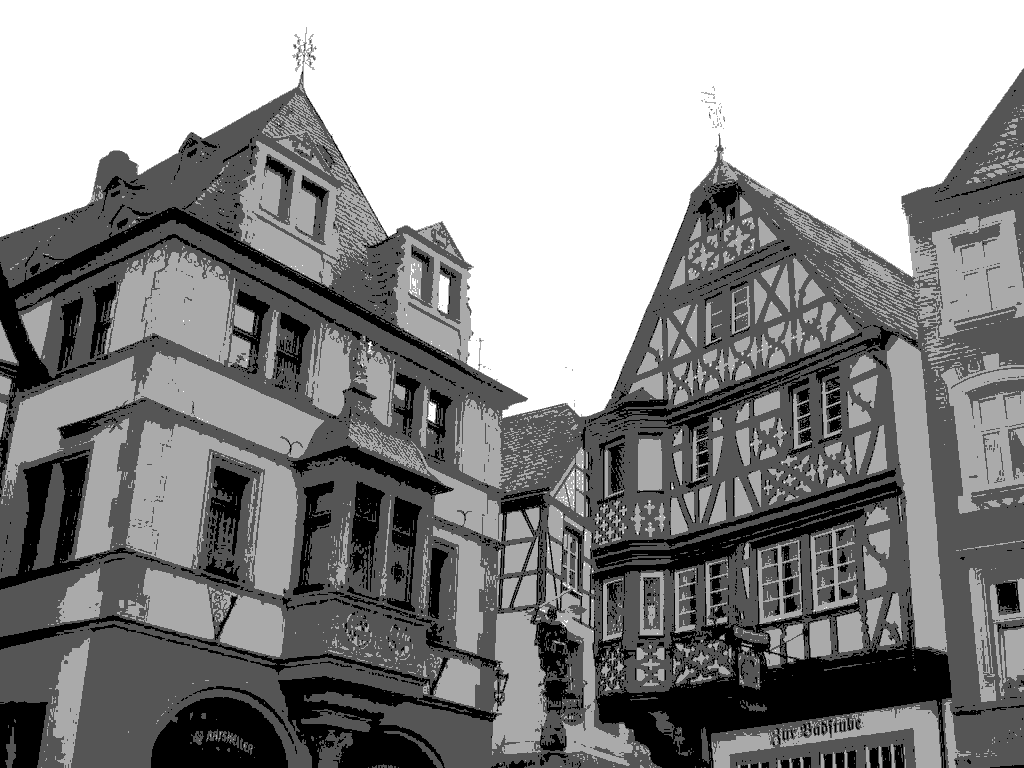

In [40]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

imageTest1 = cv.imread("/content/drive/MyDrive/koceng/old_house.jpg")

print('Bit depth')
print('---------------------------------')
try:
  depth = int(input('Masukkan nilai bit depth: '))
except ValueError:
  ('Error, not a number')

def bit_Depth(img, depth):

  level = 255/((2**depth)-1)
  new_image = np.zeros(img.shape, img.dtype)

  #INI CARANYA NGEAKSES WARNA PIKSEL
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      for c in range(img.shape[2]):
        new_image[x,y,c] = np.clip(round(img[x,y,c]/level)*level, 0, 255)

  return new_image;

ResultTest1 = bit_Depth(imageTest1, depth)
cv2_imshow(imageTest1)
cv2_imshow(ResultTest1)




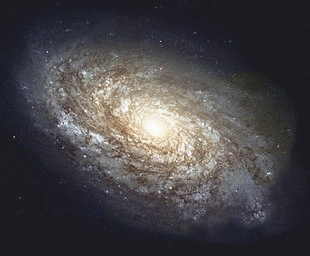

23.184369979981007


In [63]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import glob
from math import log10, sqrt

cv_img = []
for img in glob.glob('/content/drive/MyDrive/koceng/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

tot = np.average(cv_img[1:100], axis=0)

cv2_imshow(tot)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

ad = PSNR(cv_img[0], tot)
print(ad)

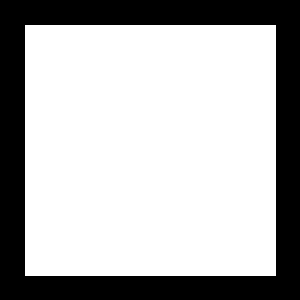

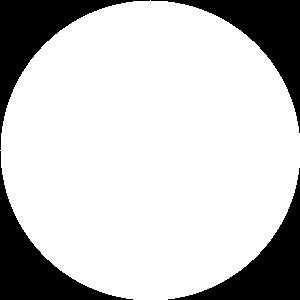

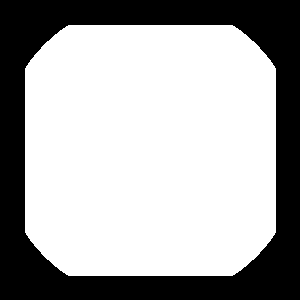

In [69]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

# creating a square of zeros using a variable
rectangle = np.zeros((300, 300), dtype="uint8")
cv.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2_imshow(rectangle)
 
# creating a circle of zeros using a variable
circle = np.zeros((300, 300), dtype="uint8")
cv.circle(circle, (150, 150), 150, 255, -1)
cv2_imshow(circle)

bitwiseAnd = cv.bitwise_and(rectangle, circle)
cv2_imshow(bitwiseAnd)

In [29]:
p = 255/15

print(p)

f = round(2/15)

print(f)

17.0
0
